In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/flights.csv')
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
df.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,07/26/2020


In [ ]:
df.describe()

,travelCode,userCode,price,time,distance
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,67971.500000,667.505495,957.37503,1.421147,546.955535
std,39243.724665,389.523127,362.31189,0.542541,208.851288
min,0.000000,0.000000,301.51000,0.440000,168.220000
25%,33985.750000,326.000000,672.66000,1.040000,401.660000
50%,67971.500000,659.000000,904.00000,1.460000,562.140000
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000


In [ ]:
df.shape

(271888, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [ ]:
df.dtypes

travelCode      int64
userCode        int64
from           object
to             object
flightType     object
price         float64
time          float64
distance      float64
agency         object
date           object
dtype: object

In [ ]:
df.corr()

,travelCode,userCode,price,time,distance
travelCode,1.000000,0.999894,0.135749,0.310754,0.310703
userCode,0.999894,1.000000,0.137282,0.314052,0.313996
price,0.135749,0.137282,1.000000,0.641800,0.641915
time,0.310754,0.314052,0.641800,1.000000,0.999990
distance,0.310703,0.313996,0.641915,0.999990,1.000000


In [ ]:
# Finding the missing values
df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [ ]:
static=pd.get_dummies(df['date'],prefix_sep='_')
static

,01/01/2021,01/01/2022,01/01/2023,01/02/2020,01/02/2021,01/02/2022,01/02/2023,01/03/2020,01/03/2021,01/03/2022,01/04/2020,01/04/2021,01/05/2020,01/05/2023,01/06/2020,01/06/2022,01/06/2023,01/07/2021,01/07/2022,01/07/2023,01/08/2021,01/08/2022,01/08/2023,01/09/2020,01/09/2021,01/09/2022,01/09/2023,01/10/2020,01/10/2021,01/10/2022,01/11/2020,01/11/2021,01/12/2020,01/12/2023,01/13/2020,01/13/2022,01/13/2023,01/14/2021,01/14/2022,01/14/2023,...,12/18/2020,12/18/2021,12/18/2022,12/19/2019,12/19/2020,12/19/2021,12/19/2022,12/20/2019,12/20/2020,12/20/2021,12/21/2019,12/21/2020,12/22/2019,12/22/2022,12/23/2019,12/23/2021,12/23/2022,12/24/2020,12/24/2021,12/24/2022,12/25/2020,12/25/2021,12/25/2022,12/26/2019,12/26/2020,12/26/2021,12/26/2022,12/27/2019,12/27/2020,12/27/2021,12/28/2019,12/28/2020,12/29/2019,12/29/2022,12/30/2019,12/30/2021,12/30/2022,12/31/2020,12/31/2021,12/31/2022
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# merge the static into main dataframe
df=pd.concat([df,static],axis=1)

In [ ]:
df.drop('date',axis=1,inplace=True)
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,01/01/2021,01/01/2022,01/01/2023,01/02/2020,01/02/2021,01/02/2022,01/02/2023,01/03/2020,01/03/2021,01/03/2022,01/04/2020,01/04/2021,01/05/2020,01/05/2023,01/06/2020,01/06/2022,01/06/2023,01/07/2021,01/07/2022,01/07/2023,01/08/2021,01/08/2022,01/08/2023,01/09/2020,01/09/2021,01/09/2022,01/09/2023,01/10/2020,01/10/2021,01/10/2022,01/11/2020,...,12/18/2020,12/18/2021,12/18/2022,12/19/2019,12/19/2020,12/19/2021,12/19/2022,12/20/2019,12/20/2020,12/20/2021,12/21/2019,12/21/2020,12/22/2019,12/22/2022,12/23/2019,12/23/2021,12/23/2022,12/24/2020,12/24/2021,12/24/2022,12/25/2020,12/25/2021,12/25/2022,12/26/2019,12/26/2020,12/26/2021,12/26/2022,12/27/2019,12/27/2020,12/27/2021,12/28/2019,12/28/2020,12/29/2019,12/29/2022,12/30/2019,12/30/2021,12/30/2022,12/31/2020,12/31/2021,12/31/2022
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df[['price']]
y=df[['distance']]

In [ ]:
X = df.iloc[:, 1:2].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor =LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Linear Model Coeff (m) =' , regressor.coef_)
print('Linear Model Coeff (b) =' , regressor.intercept_)

Linear Model Coeff (m) = [[0.16812706]]
Linear Model Coeff (b) = [434.73611001]


In [ ]:
y_predict=regressor.predict(X_test)
print(y_predict)

[[567.38836059]
 [445.32811481]
 [607.73885507]
 ...
 [496.94312232]
 [445.66436893]
 [510.05703303]]


In [ ]:
MAE = metrics.mean_absolute_error(y_test,y_predict)
MSE = metrics.mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,160.187527
MSE,39017.308418
RMSE,197.527994


In [ ]:
test_residuals=y_test - y_predict
test_residuals.head()

,distance
162386,-165.728361
12778,363.521885
207642,-141.438855
18541,358.478073
226165,-49.564672


Text(0.5, 1.0, 'Price vs Distance')

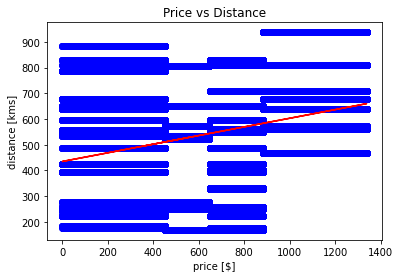

In [ ]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.ylabel('distance [kms]')
plt.xlabel('price [$]')
plt.title('Price vs Distance (Training Data')

Text(0.5, 1.0, 'Price vs Distance (Training Data')

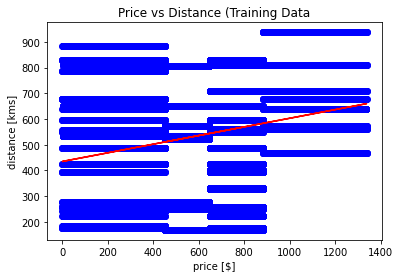

In [ ]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.ylabel('distance [kms]')
plt.xlabel('price [$]')
plt.title('Price vs Distance (Training Data)')

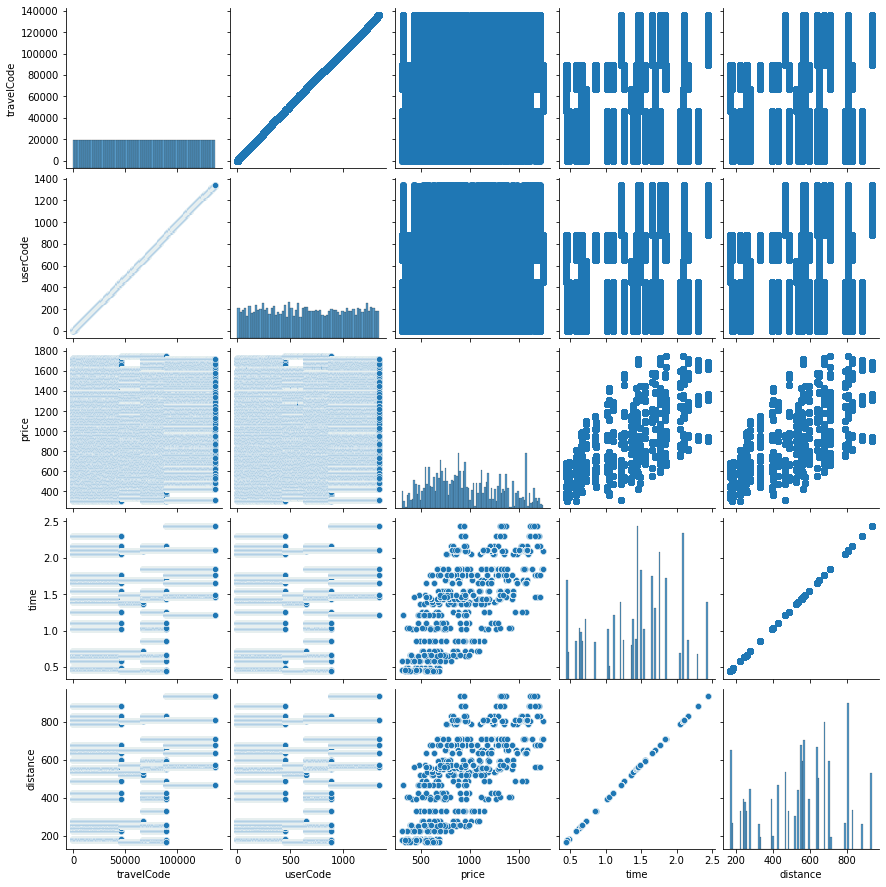

In [ ]:
g = sns.pairplot(df)
g.map_upper(plt.scatter)

In [ ]:
numeric_feature= list(df.select_dtypes(include=['int64','float64']).keys())
numeric_feature

['travelCode', 'userCode', 'price', 'time', 'distance']

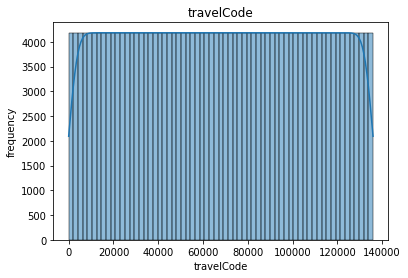

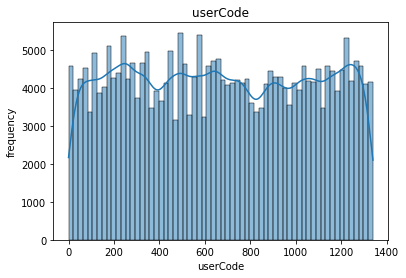

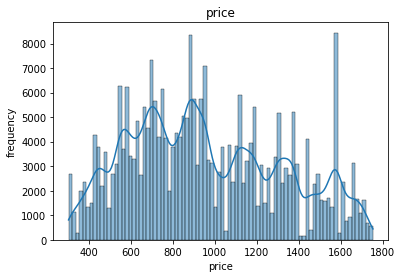

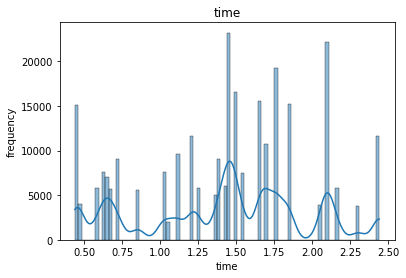

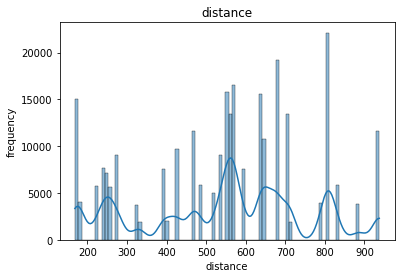

In [ ]:
for feature in numeric_feature:
    sns.histplot(data=df,x=feature,kde=True,palette='pastel')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

In [ ]:
df.mean()